# **Fake Review Detection - EDA**

### **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### **Load and Explore the Data**

In [ ]:
data=pd.read_csv('/content/fakeReviewData.csv')
data.sample(3)

,category,rating,label,text_
37642,Clothing_Shoes_and_Jewelry_5,4.0,CG,I did have an issue with the top being too tig...
22634,Pet_Supplies_5,3.0,CG,Got this for my little guy. The only problem i...
15568,Movies_and_TV_5,4.0,CG,"Temple of Doom is infamous for its suave, yet ..."


In [ ]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


None

In [ ]:
display(data['rating'].describe())

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
display(data.isnull().sum())

,0
category,0
rating,0
label,0
text_,0


In [ ]:
display(data['label'].value_counts())

,count
label,
CG,20216
OR,20216


In [ ]:
display(data['category'].unique())

array(['Home_and_Kitchen_5', 'Sports_and_Outdoors_5', 'Electronics_5',
       'Movies_and_TV_5', 'Tools_and_Home_Improvement_5',
       'Pet_Supplies_5', 'Kindle_Store_5', 'Books_5', 'Toys_and_Games_5',
       'Clothing_Shoes_and_Jewelry_5'], dtype=object)

In [ ]:
display(data['category'].value_counts())

,count
category,
Kindle_Store_5,4730
Books_5,4370
Pet_Supplies_5,4254
Home_and_Kitchen_5,4056
Electronics_5,3988
Sports_and_Outdoors_5,3946
Tools_and_Home_Improvement_5,3858
Clothing_Shoes_and_Jewelry_5,3848
Toys_and_Games_5,3794


In [ ]:
data['text_length'] = data['text_'].apply(len)
data.sample(3)

,category,rating,label,text_,text_length
1732,Home_and_Kitchen_5,1.0,CG,"the first time I took it out, the wooden part ...",110
1201,Home_and_Kitchen_5,2.0,OR,To thin and first time I sat down the string t...,111
5800,Sports_and_Outdoors_5,5.0,OR,i love this outfit it really keeps me warm and...,176


In [ ]:
display(data['text_length'].describe())

,text_length
count,40432.000000
mean,351.271963
std,369.813570
min,24.000000
25%,107.000000
50%,198.000000
75%,439.000000
max,2827.000000


**No missing data** , which is great.

**The distribution of ratings** shows a relatively high concentration of 5-star ratings, which is common in review datasets but worth noting.

**Text length** varies a lot, from 24 characters to over 2800. May need to consider truncating or handling very long reviews.

**Balanced label distribution** with 50% CG (genuine) and 50% OR (fake), which is good for training a classification model.

**Category distribution** shows some categories have more reviews than others, e.g., Kindle_Store_5 has the most.

## **EDA**

**Distribution Of Ratings**

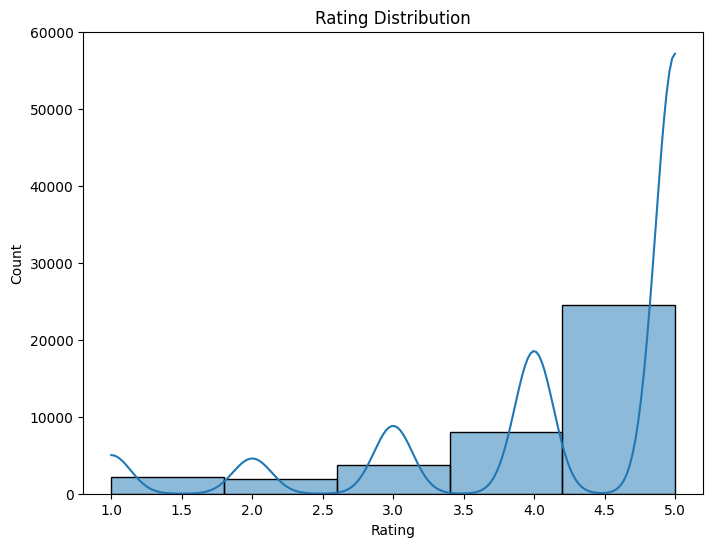

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['rating'], bins=5, kde=True)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


**Distribution Of Text Length**

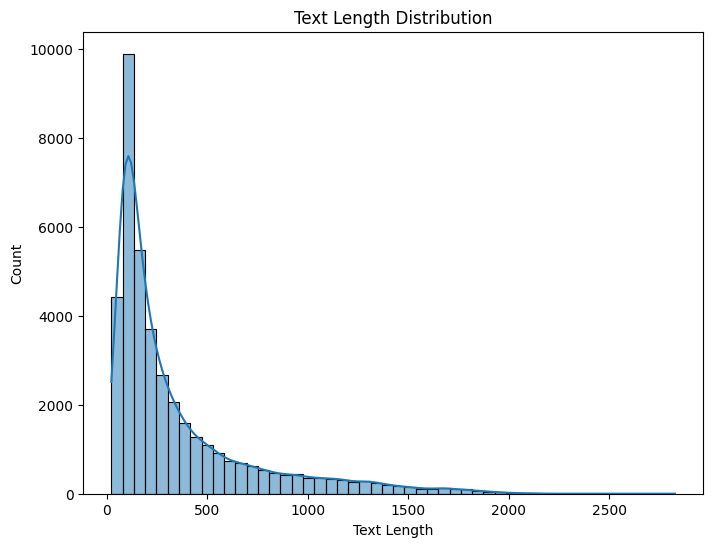

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['text_length'], bins=50, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Text Length")
plt.ylabel("Count")
plt.show()

**Category Distribution**

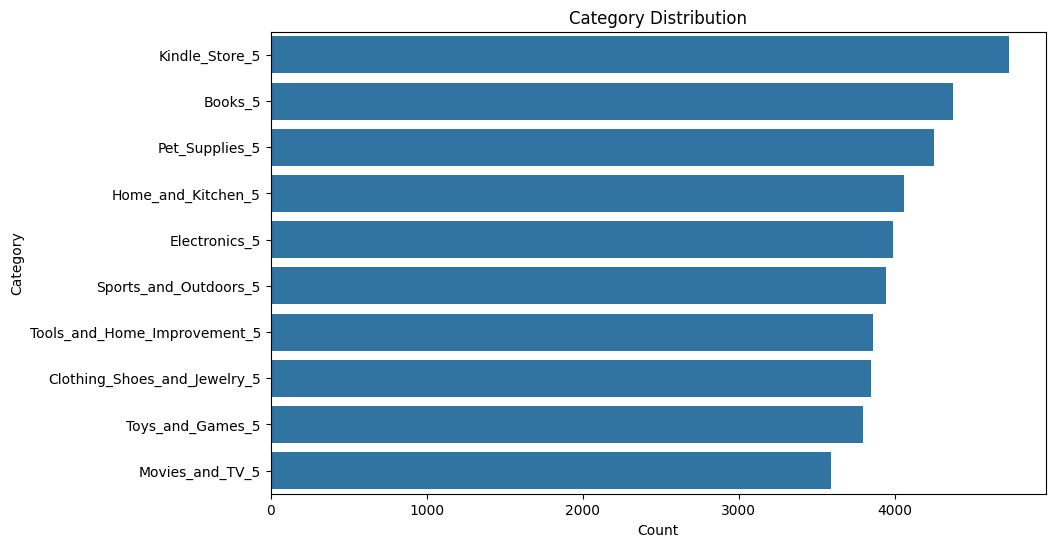

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y=data['category'], order=data['category'].value_counts().index)
plt.title("Category Distribution")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

**Label Distribution**

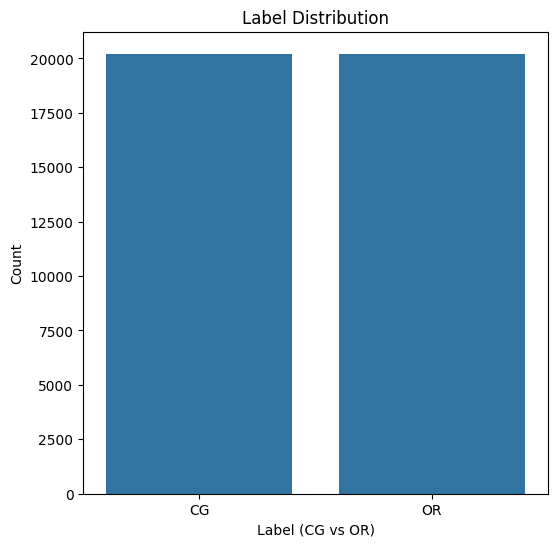

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x=data['label'])
plt.title("Label Distribution")
plt.xlabel("Label (CG vs OR)")
plt.ylabel("Count")
plt.show()

**Check For Outliers**

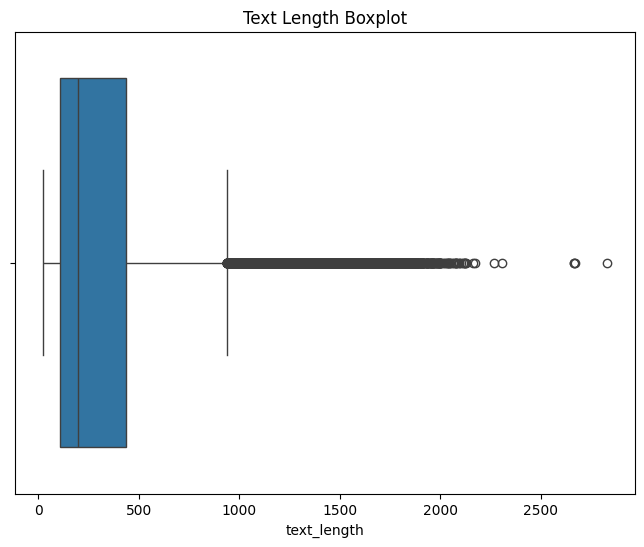

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['text_length'])
plt.title("Text Length Boxplot")
plt.show()

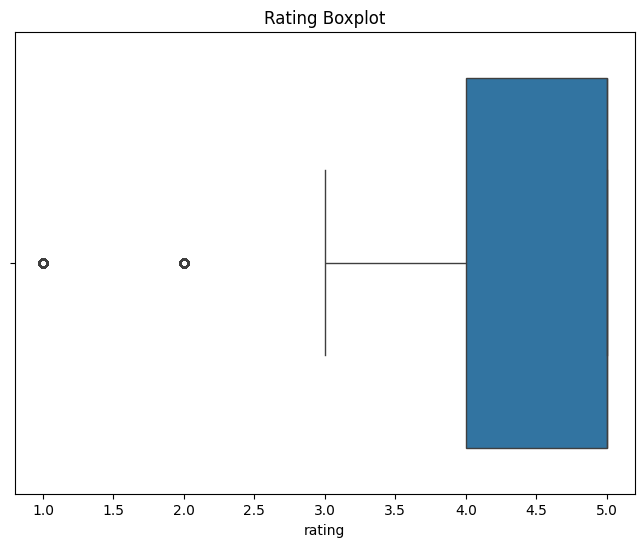

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['rating'])
plt.title("Rating Boxplot")
plt.show()

**Word cloud (for text_ column)**

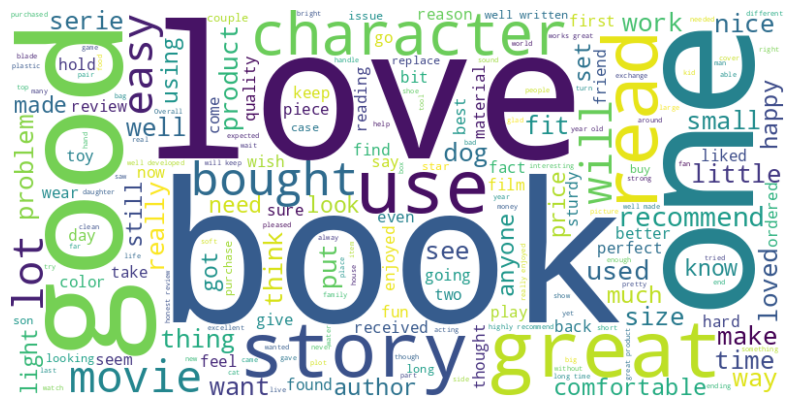

In [ ]:
all_text = " ".join(review for review in data['text_'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

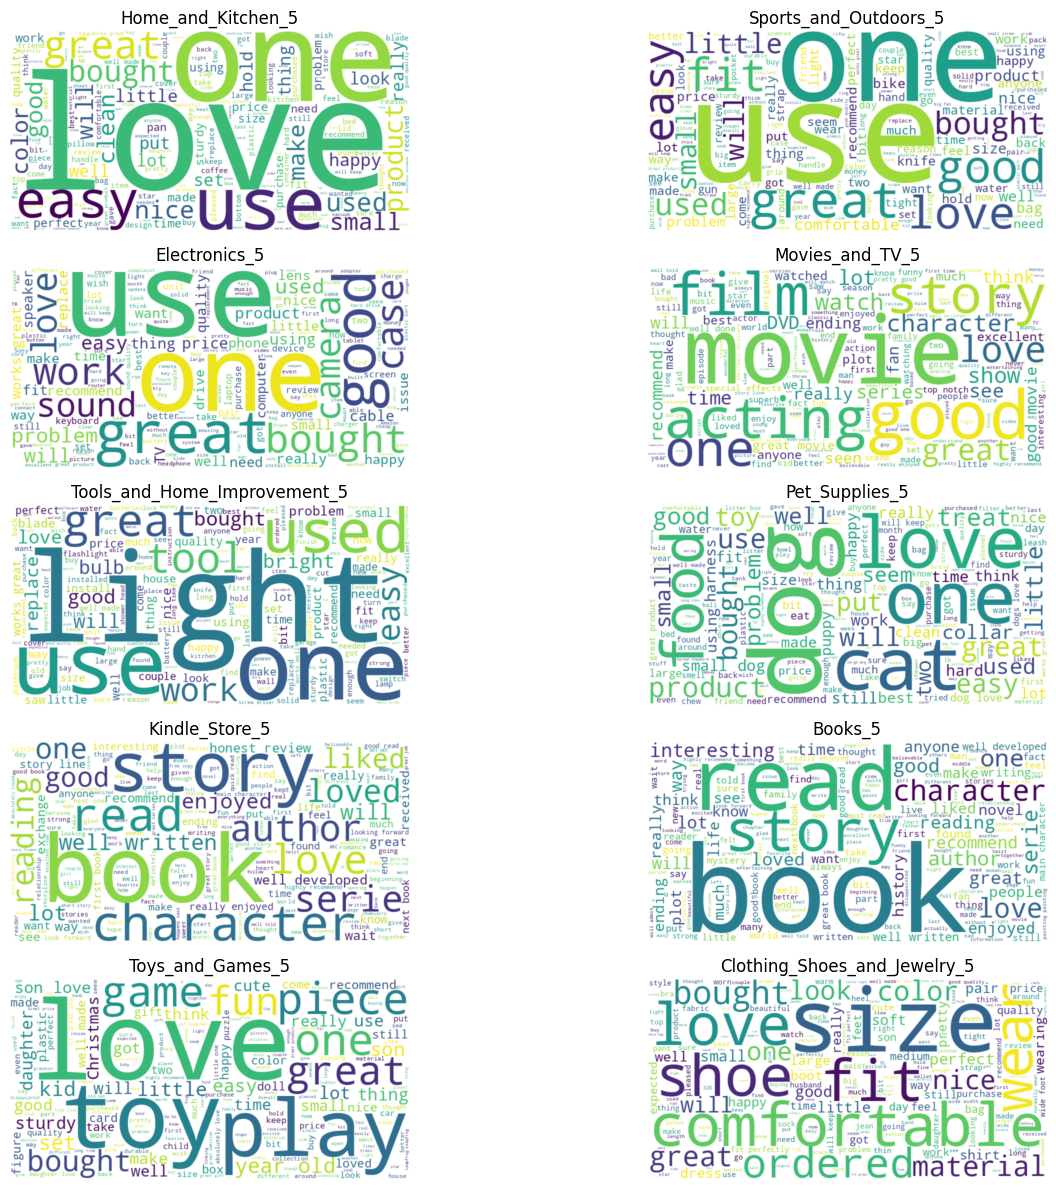

In [ ]:
categories = data['category'].unique()

plt.figure(figsize=(15, 12))

for i, category in enumerate(categories, 1):
    plt.subplot(5, 2, i)
    category_reviews = " ".join(review for review in data[data['category'] == category]['text_'])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(category_reviews)

    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(category)

plt.tight_layout()
plt.show()